<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/exercise4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from itertools import product
from sklearn.model_selection import GridSearchCV
from sklearn import tree

**---------Part 1--------**

## Question 1

In [2]:
df = pd.read_csv('/content/wine-missing.csv')
print(df.head())
print('\n \n ----Dataset description----\n')
print(df.describe())

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    white            7.0              0.27         0.36            20.7   
1  unknown            6.3              0.30         0.34             1.6   
2    white            8.1              0.28         0.40             6.9   
3  unknown            7.2              0.23         0.32             8.5   
4  unknown            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

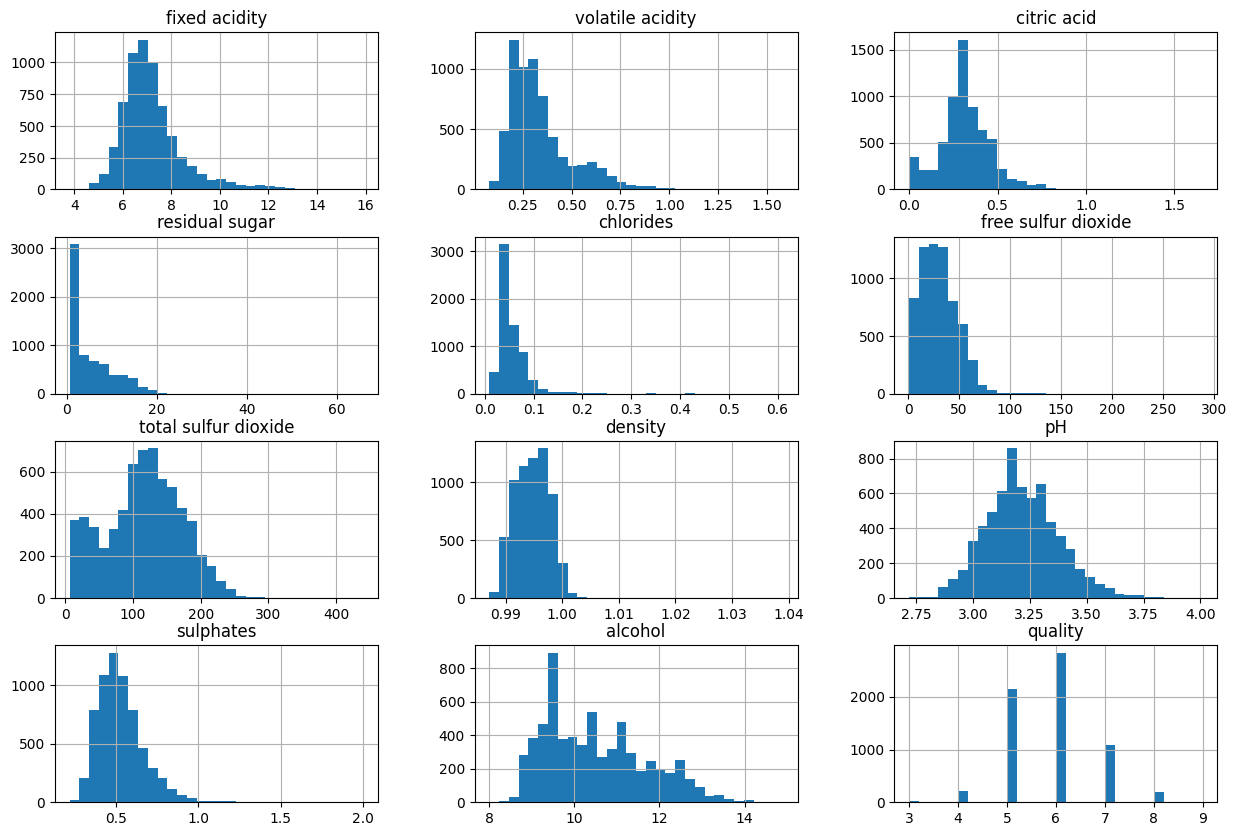

In [3]:
clm=list(df.columns)
clm.remove('type')
df.hist(column=clm,figsize=(15, 10), bins=30)

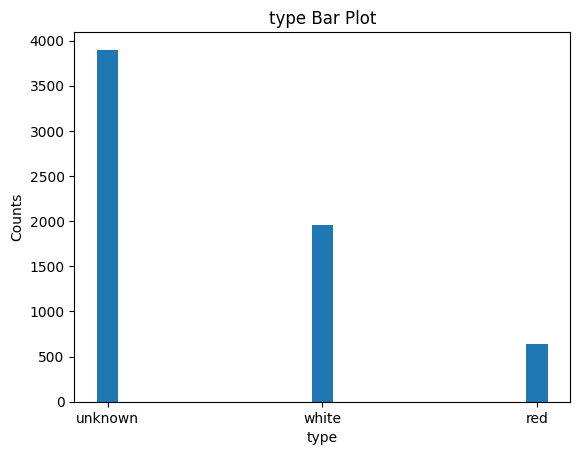

In [4]:
plt.bar(df['type'].value_counts().index, df['type'].value_counts().values, width=0.1)
plt.title('type Bar Plot')
plt.xlabel('type')
plt.ylabel('Counts')
plt.show()

Check for missing values.

In [5]:
print('Length --',len(df))
print(df.isnull().sum())

Length -- 6497
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


Missing values are observed in some columns of the dataset, but they are few compared to the overall 6.497 observations of the dataset.


In order to handle those missing values, we can either remove those rows, since they are few compared to the entire dataset size or we can fill the null values with the mean value of the corresponding column, based on the category ('type') the datapoint belongs to. <br>
For example, if a missing value is in the column 'sulphates' with 'type'=0, then it is filled with the mean of the column 'sulphates' of the datapoints that belong in 'type' 0.



In [6]:
for col in['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']:
    df[col] = df.groupby('type')[col].transform(lambda x: x.fillna(x.mean()))

Check whether all missing values have been replaced.

In [7]:
print('Length --',len(df))
print(df.isnull().sum())

Length -- 6497
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Question 2 -replacing types and creating x/y

Bellow we replacethe values 'white' , 'red' , 'unknown' with 0,1,2. Before and after the replacement, the unique values of the column 'type' along with their number of appearance are printed to compare and check that the replacement was performed crrectly.


In [8]:
print(df['type'].unique())
print(df['type'].value_counts())

['white' 'unknown' 'red']
type
unknown    3898
white      1959
red         640
Name: count, dtype: int64


In [9]:
mapping = {'white': 0, 'red': 1, 'unknown': 2}
df['type'] = df['type'].replace(mapping)
print(df['type'].unique())
print(df['type'].value_counts())

[0 2 1]
type
2    3898
0    1959
1     640
Name: count, dtype: int64


/tmp/ipython-input-1360946758.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace(mapping)


Creation of x and y and transformation to numpy.

In [10]:
input_df = df.drop(columns=['type'])
targets_df = df['type']

x = input_df.to_numpy()
y = targets_df.to_numpy()
print(x.shape, y.shape)

(6497, 12) (6497,)


## Question 3 - x/y_known and x/y_unknown

Below, the variables x_known and x_unknown are created using the corresponding y or x values defined above. They are considered known if y = 0 or y = 1, and unknown if y = 2.

In [11]:
y_known = y[(y == 0) | (y == 1)]
y_unknown = y[y == 2]

x_known = x[(y == 0) | (y == 1)]
x_unknown = x[y == 2]


## Question 4 - train split the x/y_known

Splitting the known data into train and test sets using stratify=y_known to ensure equal distribution of the classes in both datasets.

In [12]:
x_train_known, x_test_known, y_train_known, y_test_known = train_test_split(x_known, y_known,test_size=0.3,random_state=0,stratify=y_known)


##Question 5 -Random Forest in the known

In [13]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train_known, y_train_known)

# Predict on train dataset
y_pred_tr = clf.predict(x_train_known)

train_accuracy  = accuracy_score(y_train_known, y_pred_tr)
train_f1        = f1_score(y_train_known, y_pred_tr)
train_precision = precision_score(y_train_known, y_pred_tr)
train_recall    = recall_score(y_train_known, y_pred_tr)

# Predict on test dataset
y_pred = clf.predict(x_test_known)
test_accuracy  = accuracy_score(y_test_known, y_pred)
test_f1        = f1_score(y_test_known, y_pred)
test_precision = precision_score(y_test_known, y_pred)
test_recall    = recall_score(y_test_known, y_pred)

print("Train: accuracy: ", train_accuracy, " f1: ",train_f1," precission: ", train_precision, " recall: ",train_recall)
print("Test: accuracy: ", test_accuracy, " f1: ", test_f1, " precission: ", test_precision, " recall: ",test_recall)

Train: accuracy:  1.0  f1:  1.0  precission:  1.0  recall:  1.0
Test: accuracy:  0.9948717948717949  f1:  0.9895287958115183  precission:  0.9947368421052631  recall:  0.984375


We observe that the model it achieves perfect classification in all the metrics for train. On the test, it achieves very high performance (not 100% but very close to it) with accuracy being the strongest metric.
<br>
In the dataset the F1 score is more representative metric that the accuracy.
In F1 score, fault predictions (misclassifications) are represented even if they belong to minority class since it incorporates both precision (the proportion of correct positive predictions among all predicted positives) and recall (the proportion of correct positive predictions among all actual positives), which could be overlooked in accuracy. In the specific dataset, we can see (Question  2) that there is unbalance between the red and white classes, making misclassifications in favor of the white class (majority class) a possibility. Nevertheless, both metrics are very close in value, indicating no bias and reliability in the performance of the model.

## Question 6- Random Forest with weights

The class_weigth gives weights to the classes in Random Forest classifier. It can be given either “balanced” or “balanced_subsample” or none. If it is given none, then by default all the weights of classes are 1 (equally balanced). <br> If the “balanced” mode is given then it gives weights inversely proportional to the frequency with which each class appears. In the “balanced_subsample” mode, it also gives weights based on the classes but for their calculation the bootstrap sample for every tree is used rather than the entire dataset. Multi-outputs can also be supported and custom weights can also be given to classes.

In [14]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(x_train_known, y_train_known)

# Predict on train dataset
y_pred_tr = clf.predict(x_train_known)

train_accuracy  = accuracy_score(y_train_known, y_pred_tr)
train_f1        = f1_score(y_train_known, y_pred_tr)
train_precision = precision_score(y_train_known, y_pred_tr)
train_recall    = recall_score(y_train_known, y_pred_tr)

# Predict on test dataset
y_pred = clf.predict(x_test_known)
test_accuracy  = accuracy_score(y_test_known, y_pred)
test_f1        = f1_score(y_test_known, y_pred)
test_precision = precision_score(y_test_known, y_pred)
test_recall    = recall_score(y_test_known, y_pred)

print("Train: accuracy: ", train_accuracy, " f1: ",train_f1," precission: ", train_precision, " recall: ",train_recall)
print("Test: accuracy: ", test_accuracy, " f1: ", test_f1, " precission: ", test_precision, " recall: ",test_recall)

Train: accuracy:  1.0  f1:  1.0  precission:  1.0  recall:  1.0
Test: accuracy:  0.9948717948717949  f1:  0.9895287958115183  precission:  0.9947368421052631  recall:  0.984375


As can be observed, there are no differnces between the classifiers of this question ad the previous one, which is reasonable since the previous one (without the class_weight='balanced') had already achieved high metrics. This can be an indication that class imbalance doesn't affect the performance of the model, perhaps because the characteristics of red and whine are easilly seperated.

## Question 7-The Random Forest from above for the unknown (probabilites for each class)

In [15]:
y_unknown_proba=clf.predict_proba(x_unknown)

## Question 8 -Thresholding the probabilites and 'give' classes

The red column of y_unknown_proba is used since it has the value 1 (positive class). The white column could also be used, but the thresholds would be reversed (the outcome would have been the same). There are some probabilities that are between the 0.35 and 0.65 which will remain unclassified and they take the original label for the unknown class (2).


In [16]:
red_proba = y_unknown_proba[:, 1]
y_unknown_pred = np.full_like(red_proba, fill_value=2, dtype=int)

y_unknown_pred[red_proba > 0.65] = 1
y_unknown_pred[red_proba < 0.35] = 0

## Question 9-- Add the labeled from the classification of the unknown to the x/y_train_known and run Random Forest again

Check the outcome of the labeling of the unknown data. It is observed that almost all of them were classified as red and only 45 (from a total number of 3898) were unclassified. No white class samples were found.

In [17]:
unique_vals, counts = np.unique(y_unknown_pred, return_counts=True)
print(unique_vals)
print(counts)
print(len(y_unknown_pred))

[0 1 2]
[2936  917   45]
3898


To add the labeled data in the x_train_known and y_train_known, we first need to keep from the x_unknown and y_unkown the samples for which the y_unknown_pred value is dieffrent from 2 (2 is the label for the unclassified samples). After the filtering, the np.concatenate is used to append the numpy arrays and create the new ones.

In [18]:
#x_train_known = x_train_known + x_unknown that have y_unknown_pred!=2
#y_train_known = y_train_known + y_unknown that have y_unknown_pred!=2

print(type(y_unknown_pred))
print(type(x_train_known))

#keep the x/y_unknown with y_unknown_pred!=2
y_unknown_labeled=y_unknown_pred[y_unknown_pred!= 2]
x_unknown_labeled=x_unknown[y_unknown_pred!= 2]

x_train_extended = np.concatenate([x_train_known, x_unknown_labeled])
y_train_extended = np.concatenate([y_train_known, y_unknown_labeled])


print(x_train_extended.shape)
print(y_train_extended.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(5672, 12)
(5672,)


Train Random Forest in the x_train_extended and y_train_extended.

In [19]:
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(x_train_extended, y_train_extended)

RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy in train/test of 1st dataset.

In [20]:
# Predict on train_extended dataset
y_pred_tr = clf.predict(x_train_extended)
train_accuracy  = accuracy_score(y_train_extended, y_pred_tr)
print("Train: accuracy: ", train_accuracy)


# Predict on original train dataset
y_pred_tr = clf.predict(x_train_known)
train_accuracy  = accuracy_score(y_train_known, y_pred_tr)
print("Train: accuracy: ", train_accuracy)


# Predict on original test dataset
y_pred = clf.predict(x_test_known)
test_accuracy  = accuracy_score(y_test_known, y_pred)
print("Test: accuracy: ", test_accuracy)

Train: accuracy:  1.0
Train: accuracy:  1.0
Test: accuracy:  0.9948717948717949


We observe that although the training accuracy for both the extended and the original train datasets remains high, the accuracy of the test drops significantly. <br>
This can be explained by looking bellow the class distributions before and after adding the newly labeled data. By adding the newly labeled data, which all belonged to class 1 (red), the imbalance grew in favor of class 1 and the original good performance of the model was negatively affected.


In [21]:
print("Original train:", np.unique(y_train_known, return_counts=True))
print("Extended train:", np.unique(y_train_extended, return_counts=True))

Original train: (array([0, 1]), array([1371,  448]))
Extended train: (array([0, 1]), array([4307, 1365]))


## Question 10-repeat classification/labeling to the unknown until none is left as unknown

Below as x_unknown are kept only the samples of the x_unnkown that have value 2 in the y_unknown_pred(the unlabeled/unclassifed ones). This step then will be done inside the loop for each new iteration for the next ones.

In [22]:
x_unknown = x_unknown[y_unknown_pred == 2]

In [23]:
len(x_unknown)

45

In the loop, while there are samples in the x_unknown (there are unlabeled data) the classifier predicts for the unkown ones, then via thresholding there is labeling for some of the samples. Those that are labeled as known are added to the train subset and then the classifier will be trained again. Only the unclassified ones are kept in the x_unkown. The classifier will be trained for the new concetrated data and the accuracies are printed. <br>
There is a scenario where some samples will always be unclassified or they will be classified after many iterations. For this case there is a control that checks the x_unknown_labeled and if no samples can be labeled from the x_unkown, then the loop stops.

In [24]:
while len(x_unknown) > 0:
    y_unknown_proba = clf.predict_proba(x_unknown)
    red_proba = y_unknown_proba[:, 1]
    y_unknown_pred = np.full_like(red_proba, fill_value=2, dtype=int)

    #8 Thresholding
    y_unknown_pred[red_proba > 0.65] = 1
    y_unknown_pred[red_proba < 0.35] = 0

    #9 concatenate
    y_unknown_labeled=y_unknown_pred[y_unknown_pred!= 2]
    x_unknown_labeled=x_unknown[y_unknown_pred!= 2]

    if len(x_unknown_labeled) == 0:
        print("No more confident samples, stopping.")
        break

    x_train_extended = np.concatenate([x_train_extended, x_unknown_labeled])
    y_train_extended = np.concatenate([y_train_extended, y_unknown_labeled])

    print("Shpae :", x_train_extended.shape)
    print("Shpae :", y_train_extended.shape)

    # keep in the unkown only those that have label 2
    x_unknown = x_unknown[y_unknown_pred == 2]
    print("Length unknown: ", len(x_unknown))
    unique_vals, counts = np.unique(y_unknown_pred, return_counts=True)
    print("Unique values in unkowns (after labelig; )",unique_vals)
    print(counts)

    # 9 run the clf
    clf.fit(x_train_extended, y_train_extended)

    #9 Predictions-Metrics
    # Predict on train_extended dataset
    y_pred_tr = clf.predict(x_train_extended)
    train_accuracy  = accuracy_score(y_train_extended, y_pred_tr)
    print("Train: accuracy: ", train_accuracy)


    # Predict on original train dataset
    y_pred_tr = clf.predict(x_train_known)
    train_accuracy  = accuracy_score(y_train_known, y_pred_tr)
    print("Train: accuracy: ", train_accuracy)


    # Predict on original test dataset
    y_pred = clf.predict(x_test_known)
    test_accuracy  = accuracy_score(y_test_known, y_pred)
    print("Test: accuracy: ", test_accuracy)

    print("\n")


Shpae : (5694, 12)
Shpae : (5694,)
Length unknown:  23
Unique values in unkowns (after labelig; ) [0 1 2]
[14  8 23]
Train: accuracy:  1.0
Train: accuracy:  1.0
Test: accuracy:  0.9948717948717949


Shpae : (5696, 12)
Shpae : (5696,)
Length unknown:  21
Unique values in unkowns (after labelig; ) [0 2]
[ 2 21]
Train: accuracy:  1.0
Train: accuracy:  1.0
Test: accuracy:  0.9948717948717949


Shpae : (5701, 12)
Shpae : (5701,)
Length unknown:  16
Unique values in unkowns (after labelig; ) [0 1 2]
[ 2  3 16]
Train: accuracy:  1.0
Train: accuracy:  1.0
Test: accuracy:  0.9948717948717949


No more confident samples, stopping.


Check if the final length match the original length of the dataframe.

In [25]:
print(len(df))
print(len(y_train_extended) + len(x_test_known) + len(x_unknown))


6497
6497


In [28]:
unique_values, counts = np.unique(y_train_extended, return_counts=True)

for val, cnt in zip(unique_values, counts):
    print(f"Value {val} appears {cnt} times")

Value 0 appears 4325 times
Value 1 appears 1376 times


## **------- Part 2 ---**

## Question 1

In [29]:
df = pd.read_csv('/content/wine-full.csv')
print(df.head())
print('\n \n ----Dataset description----\n')
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

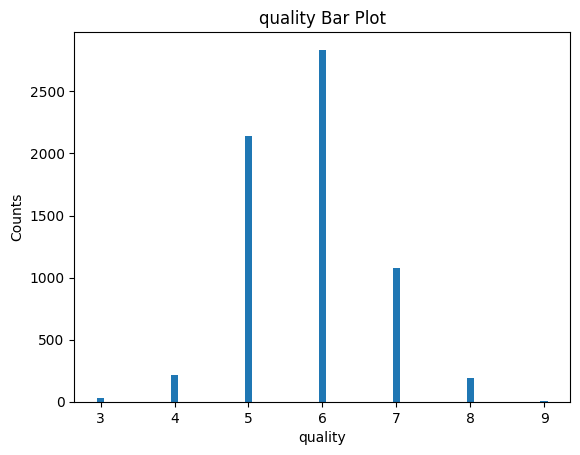

In [32]:
plt.bar(df['quality'].value_counts().index, df['quality'].value_counts().values, width=0.1)
plt.title('quality Bar Plot')
plt.xlabel('quality')
plt.ylabel('Counts')
plt.show()

From the plot we can see that the data distribution based on the 'quality' class is unbalanced. The values 6 and 5 are the most frequent ones, whereas the values 3 and 9 are the minority. The values 4 7 and 8 are also less represented in comparison to the 5 and 6.

Check for missing values

In [33]:
print('Length --',len(df))
print(df.isnull().sum())

Length -- 6497
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In order to handle those missing values, we can either remove those rows, since they are few compared to the entire dataset size or we can fill the null values with the mean value of the corresponding column, based on the category ('type') the datapoint belongs to. <br>
For example, if a missing value is in the column 'sulphates' with 'quality'=0, then it is filled with the mean of the column 'sulphates' of the datapoints that belong in 'type' 0.



In [34]:
for col in['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']:
    df[col] = df.groupby('quality')[col].transform(lambda x: x.fillna(x.mean()))

In [35]:
print('Length --',len(df))
print(df.isnull().sum())

Length -- 6497
type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## Question 2-red and white quality comparison

In order to see the connection between the quality and the type of wine, a scatter plot with those two variables is made.

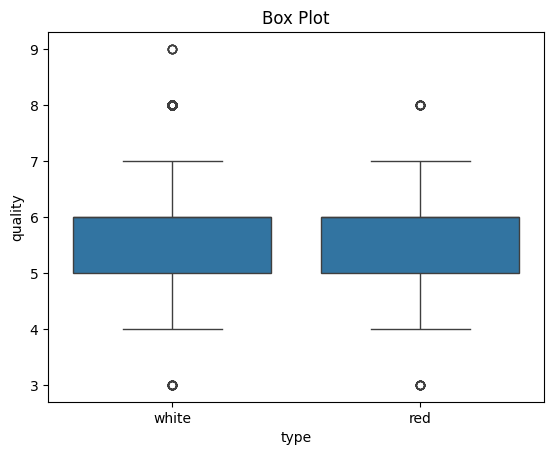

In [36]:
sns.boxplot(x='type', y='quality', data=df)
plt.title('Box Plot')
plt.xlabel('type')
plt.ylabel('quality')
plt.show()


Moreover, below the mean and median based of the quaity based on the type they belong to is calculated.

In [37]:
summary = df.groupby('type')['quality'].agg(['mean', 'median', 'count'])
print(summary)

           mean  median  count
type                          
red    5.636023     6.0   1599
white  5.877909     6.0   4898


As it is observed from both the plot and the means and medians, there isn't substantial differnce in quality betweent the red and white wines. Based on their mean quality, the white wines have higher value, which means higher quality, but the difference between red and white is small (approximetely 0.2). The median is identical for both types, around 6.0 (this is also seen in the boxplot). The same median indicates similar behaviour between the 2 classes regarding the quality. <br>

The higher mean is indicatin that there is slightly higher quality in white wines, but it should be metioned that the count of white wines is larger than that of red, which could affect the values of the mean.

## Question 3-quality-residual sugar

The residual sugar shows how sweet or dry is the wine. To see the connection between residual sugar and quality, we create a boxplot.

<Axes: xlabel='quality', ylabel='residual sugar'>

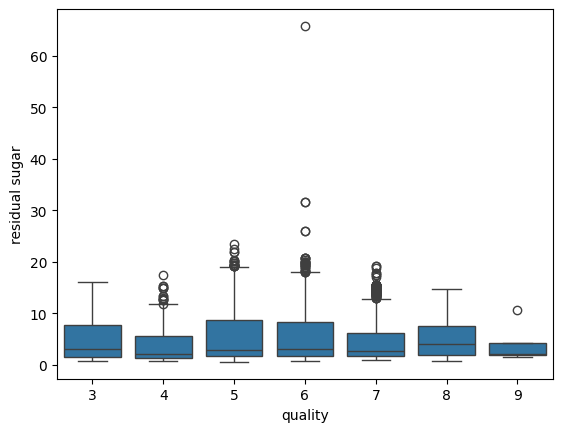

In [38]:
sns.boxplot(data=df, x='quality', y='residual sugar')


The majority of wines in the dataset fall within quality scores 3, 5, and 6. The wines that have residual sugar 0-10 g/L can be categorized as dry, the ones with 10-35 g/L medium and >35 g/L are sweet and we can see that the majority of the wines are dry and both dry and medium-sweet wines appear across the full range of quality scores, including both low and high ratings. <br>
The sweet wines seem to be between the quality scores 4-7. However but their number is smaller than that of dry or medium and due to their more limited representation, we cannot clearly say that they are associated with higher quality.
<br>
So, there is no clear connection between residual sugar levels and wine quality, indicating that other factors likely play a more significant role in quality assessment.

## Question 4 - x/y creation, train/test split

The type column has strings so we replace them with numbers 0 for white and 1 for red.

In [39]:
print(df['type'].unique())
print(df['type'].value_counts())

mapping = {'white': 0, 'red': 1}
df['type'] = df['type'].replace(mapping)
print(df['type'].unique())
print(df['type'].value_counts())

['white' 'red']
type
white    4898
red      1599
Name: count, dtype: int64
[0 1]
type
0    4898
1    1599
Name: count, dtype: int64


/tmp/ipython-input-3007202212.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace(mapping)


Creation of x(inputs) and y(outcomes) with y being the quality column

In [40]:
input_df = df.drop(columns=['quality'])
targets_df = df['quality']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

Splitting in tyrain test with proportion 90-10 and random seed=0.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

## Question 5 - Decision tree (mae)

In [42]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")

Mean Absolute Error: 0.465


## Question 6 - Decision tree for seeds 0-9 (mae and std)

In [43]:
mae_values = []

for seed in range (10):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)

  model = DecisionTreeRegressor(random_state=0)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mae_values.append(mae)
  print(f"Seed {seed} - MAE: {mae:.3f}")


mean_mae = np.mean(mae_values)
std_mae = np.std(mae_values)

print(f"\nΜέσος Όρος MAE: {mean_mae:.3f}")
print(f"Τυπική Απόκλιση MAE: {std_mae:.3f}")

Seed 0 - MAE: 0.465
Seed 1 - MAE: 0.508
Seed 2 - MAE: 0.426
Seed 3 - MAE: 0.474
Seed 4 - MAE: 0.488
Seed 5 - MAE: 0.443
Seed 6 - MAE: 0.482
Seed 7 - MAE: 0.423
Seed 8 - MAE: 0.431
Seed 9 - MAE: 0.477

Μέσος Όρος MAE: 0.462
Τυπική Απόκλιση MAE: 0.028


The mean value of the MAE provides an estimate of the expected prediction error of the model and the standard deviation reflects the stability of the model across different train/test splits. As we observe, the mean MAE is 0.462, and the standard deviation is 0.028, which is low. This indicates that the model’s error remains consistent across different random seeds, suggesting that the model is both stable and reliable, with an expected error close to 0.462.

## Question 7 - split in train/test/val

Split in train/test/validation where 80-20 is the propotion of train-validtion. First we split in train test and then we split the train in train again and validation.

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)


x_train_final, x_val, y_train_final, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

x_train_final.shape, y_train_final.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape


((4677, 12), (4677,), (1170, 12), (1170,), (650, 12), (650,))

Fine tuning with 15 different parameters

The product will take and execute the loop for all the possible combinatios of the variables that are given (max_depth and min_samples_split) which are 15 in total (3 max_depth*5 min_samples_split). <br>
Max depth is the maximum lengtht the tree can have and min_samples_splitis sets the minimum number of samples a node must have in order to be split.

In [45]:
max_depth = [3, 5, 7]
min_samples_split = [2, 5, 10, 20, 50]

results = []
for depth, split in product( max_depth, min_samples_split):
    model = DecisionTreeRegressor(
        max_depth=depth,
        min_samples_split=split,
        random_state=0
    )
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_val_pred = model.predict(x_val)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)


    results.append({
        "max_depth": depth,
        "min_samples_split": split,
        "mae_train": mae_train,
        "mae_val": mae_val
    })


df = pd.DataFrame(results)
print(df)


    max_depth  min_samples_split  mae_train   mae_val
0           3                  2   0.583271  0.579846
1           3                  5   0.583271  0.579846
2           3                 10   0.583271  0.579846
3           3                 20   0.583271  0.579846
4           3                 50   0.583271  0.579846
5           5                  2   0.536962  0.531974
6           5                  5   0.536962  0.531974
7           5                 10   0.536962  0.531974
8           5                 20   0.536962  0.531974
9           5                 50   0.536962  0.531974
10          7                  2   0.486881  0.477261
11          7                  5   0.488220  0.478258
12          7                 10   0.492038  0.478635
13          7                 20   0.495022  0.484690
14          7                 50   0.501995  0.492970


The difference between the MAE in the training and validation sets is relatively small, which indicates that the model does not show signs of overfitting. Overall, the parameter max_depth has a stronger impact on performance compared to min_samples_split, as deeper trees consistently reduce the error. Among the 15 tested configurations, the best performance was achieved with max_depth=7 and min_samples_split=2, yielding the lowest validation MAE (0.477261).

## Question 8 -- Train or Validation set is more reliable for choosing parameters?

The validation set is more reliable for the selection of hyperparameters. The reason is that the training set is used for the model’s learning process, and therefore its performance on these data isn't an objective evaluation criterion, since the model has already adapted to them. <br>
The validation set on the other hand, contains unseen data that have not been used during training, and thus provides a better estimation of the model’s generalization ability. <br>
Therefore, choosing hyperparameters based on the validation set reduces the risk of overfitting and leads to more reliable performance on new, unseen data.

## Question 9- cross validation with grid search

Split train-test in 90-10 ratio.

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

For the parametres check, the same parameters that were used in the Question 7 are used now for comparison.

In [47]:
model = DecisionTreeRegressor(random_state=0)

param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10, 20, 50]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=10,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best mean MAE (cv):", -grid_search.best_score_)


Best parameters: {'max_depth': 7, 'min_samples_split': 10}
Best mean MAE (cv): 0.5592068122653957


In cross validation the training set is seperated in K parts (in this case, in 10) and each time K-1 subsets are used for training and 1 subset is used for validation, until all of the K subsets have been used for validation. <br>
Grid search then looks for the best combination among the 15 scenarios. Each scenario is trained using cross validation instead of a fixed validation set as before. <br> The best one is for max_depth 7 and minimum number of splits (min_samples_split) 10. <br>
The mean MAE that is calculated means that this is approximately the value of error (MAE) that should be expected from the model across different variations of the training/validation split.

## Question 10- from grid search with cross-validation predict in test.

Below we run the model with the parameters that gave the higher performance (max_depth=7 and min_samples_split=10).

In [48]:
model = DecisionTreeRegressor(
        max_depth=7,
        min_samples_split=10,
        random_state=0
    )

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")


Mean Absolute Error: 0.549


In the questions, the tactics that have been used are: random seed in a loop to find the different MAEs, creation of training and validation sets and trial of 15 combinations using the product (it runs the model for all the possible combinations of the given parameters), and grid search for the same 15 parameters with cross‑validation.
<br>
In the first scenario, there is no validation set, and the only thing that changes between runs is the train–test split, which is controlled by different random seeds. Each seed shuffles the dataset differently before splitting it into 90% training and 10% testing. As a result, the model is trained and evaluated on different subsets of the data in each iteration. <br>The hyperparameters of the model remain fixed and as a result the performance of the model, is affected only from the way the data is split. This demonstrates how sensitive the model is to changes in the training and testing samples and to estimate the stability of the Mean Absolute Error across different splits.
<br>
In the second scenario, the dataset is split into  training set, validation set and test set, all of which remain fixed during the training of the model. Different combinations of hyperparameters are compared based on the validation MAE. In this scenario, only the choice of hyperparameters influences the performance of the model.
<br>
In the third scenario, k-fold cross-validation with grid search is used to evaluate the same 15 hyperparameter combinations that were tested in the second case. In this scenario, the training and validation sets aren't fixed, instead they are split into different train/validation folds using 10-fold cross-validation. Grid search is used to test all the possible scenarios and calculate the MAEs. This approach reduces the risk of choosing parameters that perform well only on a particular validation split and it is more robust.
 <br>
From those techniques, the most reliable is the third, where there is searching of the best parameters out of the 15 given and the validation subset used is not fixed. This means that the model will be trained and evaluated on more samples.

## Question 11-max_depth =5 and feature importance

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5847, 12), (5847,), (650, 12), (650,))

GridSearchCV automatically computes the mean validation MAE across the 10 folds for every hyperparameter combination.

In [50]:
model = DecisionTreeRegressor(random_state=0)

param_grid = {
    "max_depth": [5],
    "min_samples_split": [2, 5, 10, 20, 50]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",
    cv=10,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best mean MAE (cv):", -grid_search.best_score_)


Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Best mean MAE (cv): 0.5665577606143986


Plot the best tree and find the rules

In [51]:
model = DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=2,
        random_state=0
    )

model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.3f}")


Mean Absolute Error: 0.555


[Text(0.47708333333333336, 0.9166666666666666, 'x[11] <= 10.625\nsquared_error = 0.759\nsamples = 5847\nvalue = 5.821'),
 Text(0.22083333333333333, 0.75, 'x[2] <= 0.237\nsquared_error = 0.554\nsamples = 3486\nvalue = 5.534'),
 Text(0.34895833333333337, 0.8333333333333333, 'True  '),
 Text(0.10833333333333334, 0.5833333333333334, 'x[2] <= 0.207\nsquared_error = 0.593\nsamples = 954\nvalue = 5.916'),
 Text(0.06666666666666667, 0.4166666666666667, 'x[8] <= 0.998\nsquared_error = 0.625\nsamples = 598\nvalue = 6.027'),
 Text(0.03333333333333333, 0.25, 'x[6] <= 6.5\nsquared_error = 0.537\nsamples = 489\nvalue = 5.904'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 0.5\nsamples = 8\nvalue = 4.5'),
 Text(0.05, 0.08333333333333333, 'squared_error = 0.504\nsamples = 481\nvalue = 5.927'),
 Text(0.1, 0.25, 'x[3] <= 0.305\nsquared_error = 0.648\nsamples = 109\nvalue = 6.578'),
 Text(0.08333333333333333, 0.08333333333333333, 'squared_error = 0.358\nsamples = 55\nvalue = 7.073'),

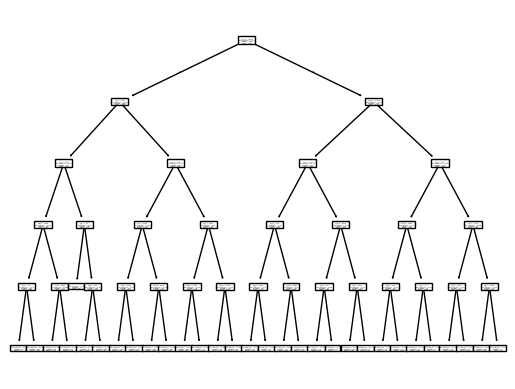

In [ ]:
tree.plot_tree(model)

Below are the rules generated from the tree.

Feature x[11] is the primary splitting factor.
Higher values of x[11] (greater than around 10.6) generally lead to higher predicted scores, while lower values result in lower predictions.

Feature x[2] also plays a significant role.
When x[2] is small (below approximately 0.24), the predicted value tends to be lower. Larger values of x[2] push the prediction upward.

Very low values of x[6] (≤ 6.5) lead to particularly low predictions.
When x[6] is above this threshold, the predicted score stabilizes at moderate levels (around 5.9–6.0).

Features x[8] and x[3] interact to form important conditional rules.
For example, when x[8] > 0.998 and x[3] ≤ 0.305, the model predicts very high scores (above 7).
When x[3] is higher, the prediction decreases (around 6.0).

The highest predicted values (above 6.5) occur when x[11] > 11.7.
Within this region, the prediction increases further when several other features are also relatively low — such as x[4], x[5], x[9], x[8], and x[10].

Barplot with feature importance.

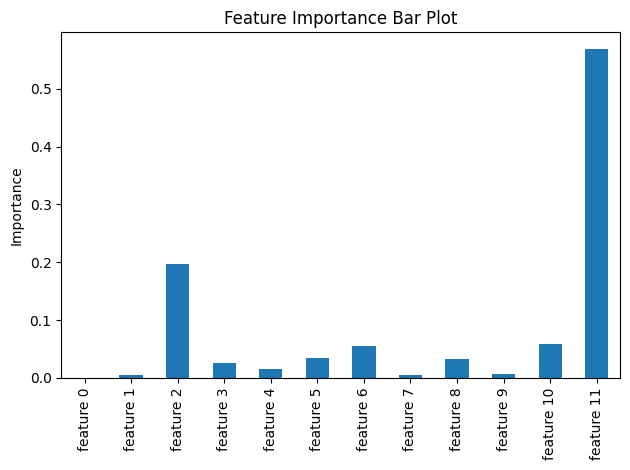

In [52]:
importance = model.feature_importances_
feature_names = [f"feature {i}" for i in range(x.shape[1])]
forest_importances = pd.Series(importance, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title('Feature Importance Bar Plot')
ax.set_ylabel('Importance')
fig.tight_layout()

As we can see, the most important feature appears to be feature 11 (alcohol), followed by feature 2 (volatile acidity). These two features influence the quality of the wine the most. Feature 0 (type) has almost no effect, while features 7 (total sulfur dioxide) and 9 (pH) also have very little impact.